In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
#loading the data
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])

#splitting the data
x_data = data['Population'].values
y_data = data['Profit'].values.reshape(len(x_data), 1)

In [93]:
#feature scalling the data
def feature_normalize(data):
    mean = np.mean(data)
    std = np.mean(data)
    new_data = (data - mean) / std
    
    return new_data, mean, std

x_data, mean, std = feature_normalize(x_data)

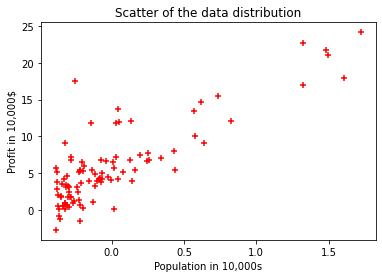

In [94]:
#ploting the data
plt.title('Scatter of the data distribution')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000$')
plt.scatter(x_data, y_data, color='red', marker='+')

In [95]:
#fomating the x_data to be a (m, 2) shaped matrix
ones = np.ones((len(x_data), 2))
ones[:, 1] = x_data
x_data = ones

In [96]:
#creating some utility functions
def cost_function(x_data, y_data, theta):
    h = np.dot(x_data, theta)
    err_sq = (h - y_data) ** 2
    err_sum = err_sq.sum()
    cost = (err_sum / (2 * len(x_data)))
    
    return cost

def gradient_descent(x_data, y_data, theta, learning_rate):
    h = np.dot(x_data, theta)
    err = h - y_data
    dtheta = (1 / len(x_data)) * np.dot(x_data.T, err)
    theta = theta - learning_rate * dtheta
    
    return theta

In [97]:
#creating the training function
def train_model(x_data, y_data, theta, learning_rate, nbr_iter):
    cost = []
    for i in range(nbr_iter):
        cost.append(cost_function(x_data, y_data, theta))
        theta = gradient_descent(x_data, y_data, theta, learning_rate)
        
    return theta, cost

In [143]:
#running the training and finding the optimal solution
nbr_features = x_data.shape[1]
initial_theta = np.zeros([nbr_features, 1])
learning_rate = 0.01
nbr_iter = 1800

theta, cost = train_model(x_data, y_data, initial_theta, learning_rate, nbr_iter)
[theta[0][0], theta[1][0]], cost[-1]

([5.83913497031969, 9.558630321245195], 4.480445742769536)

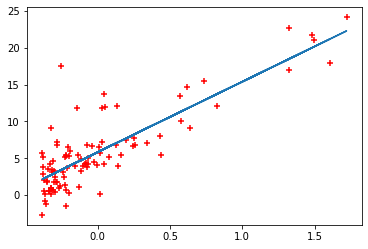

In [144]:
#ploting the model
plt.scatter(x_data[:, 1], y_data, color='red', marker='+')
plt.plot(x_data[:,1], np.dot(x_data, theta))

In [100]:
#creating the prediction function
def predict_profit(population):
    x_data = np.array([population])
    x_data = (x_data - mean) / std
    x_data = np.append(1, x_data)
    return np.dot(x_data, theta)

In [145]:
#running some predictions to make sure the model is well trained (we can use some testing data here)
predict_profit(3.5)[0], predict_profit(7)[0], predict_profit(35)[0]

(0.3805078506674491, 4.480511052260403, 37.280536665004036)